In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pp
import math


In [13]:
# Reading CSV File and storing each individual column as arrays
df = pd.read_csv("justiceCentered1.csv", encoding= 'unicode_escape')
issueArea = df["issueArea"]
justice = df["justice"]
vote = df["vote"]
direction = df["direction"]
# 102 - 117



In [14]:
# Creating a new dataframe based only on justice and direction
dataset = pd.DataFrame({'justice': justice, 'direction': direction})

justiceLeanings = []

# Find the average of each justice's votes - [1,2] where 1 is more conservative and 2 is more liberal
for area in range(1, 15):
    issueAreaLeanings = [] # issueAreaLeanings is the list for each issueArea
    dataset = pd.DataFrame({'justice': justice[issueArea == area], 'direction': direction[issueArea == area]})
    for i in range(78, 118):
        issueAreaLeanings.append(np.mean(dataset[dataset['justice'] == i])) # Adding each justice's mean leaning score to the issueAreaLeanings
    justiceLeanings.append(issueAreaLeanings)



In [93]:
# Initialize empty numpy arrays for the x-axis(justiceLabels) and the y-axis(justiceData)
arraySize = len(justiceLeanings[0]) 
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Initialize both arrays with the average values calculated in the cell prior
for i in range (0, 40):
    if (justiceLeanings[0][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[0][i]["direction"] # y axis
        justiceLabels[i] = justiceLeanings[0][i]["justice"] # x axis

# Perform a k-means clustering with 3 clusters (Chose 3 based on elbow method in cell below)

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceLabels)
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)


array([[1.31371571],
       [1.79217389],
       [1.58128233]])

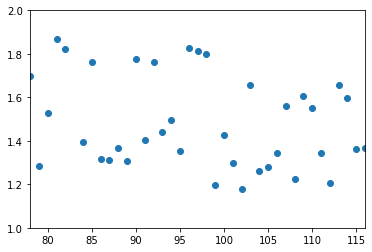

In [33]:
# Plotting unclustered data
plt.scatter(justiceLabels, justiceData)
plt.xlim(78, 116)
plt.ylim(1, 2)
plt.show()

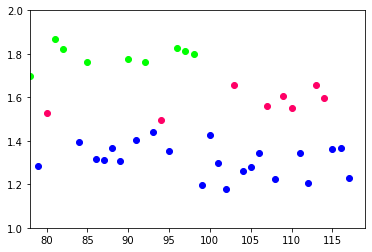

In [34]:
# Adding colors to the clustered data to show the clusters
colors=["#0000FF", "#00FF00", "#FF0066", "#FF8000"]
fig = plt.figure()

plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

In [35]:
# Elbow Method to find out the optimal number of clusters for this issue area
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

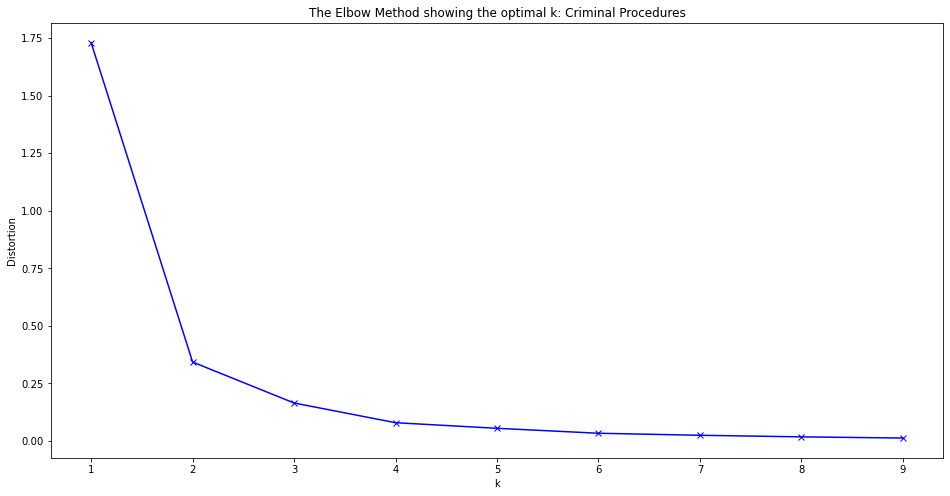

In [36]:
# Plotting elbow graph and subsequent analysis
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Criminal Procedures')
plt.show()


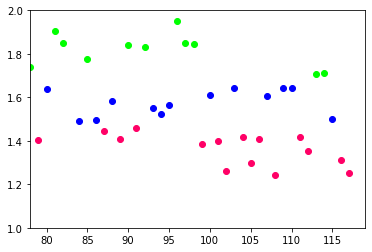

In [41]:
# Issue Area 2: Civil Rights

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[1])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[1][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[1][i]["direction"]
        justiceLabels[i] = justiceLeanings[1][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066", "#FF8000"]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

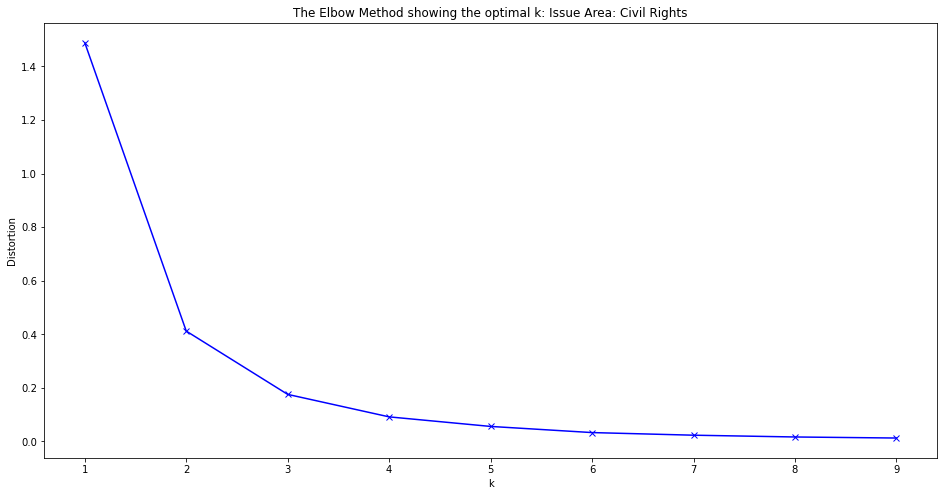

In [42]:
# Elbow Method for Issue 2: Civil Rights
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Civil Rights')
plt.show()

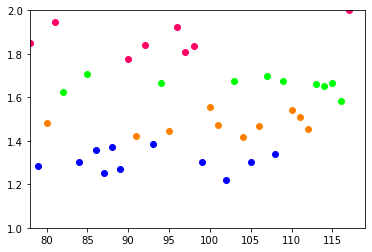

In [45]:
# Issue Area 3: First Amendment

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[2])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[2][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[2][i]["direction"]
        justiceLabels[i] = justiceLeanings[2][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=4)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

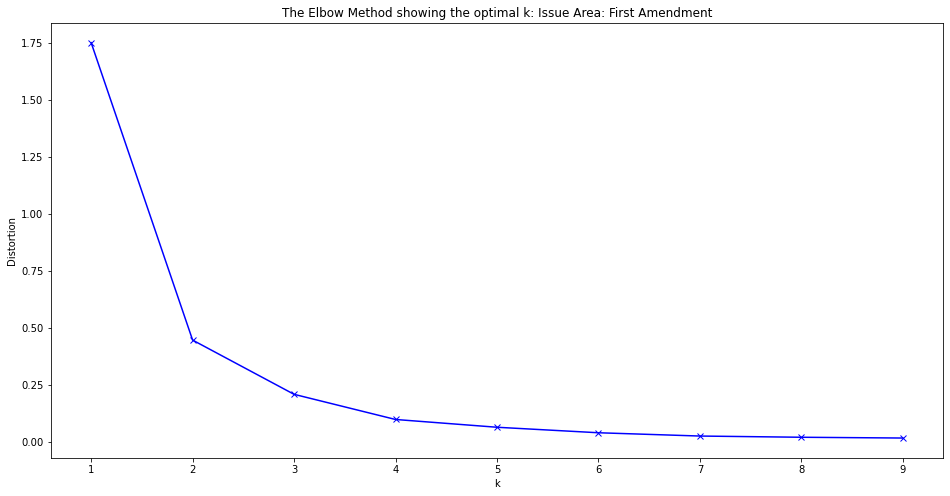

In [47]:
# Elbow Method for Issue 3: First Amendment; optimal clusters: 4
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: First Amendment')
plt.show()

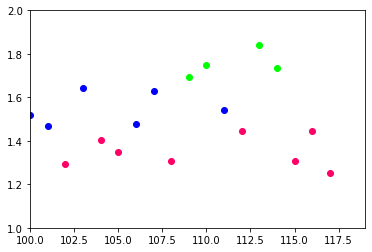

In [49]:
# Issue Area 4: Due Process

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[3])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[3][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[3][i]["direction"]
        justiceLabels[i] = justiceLeanings[3][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

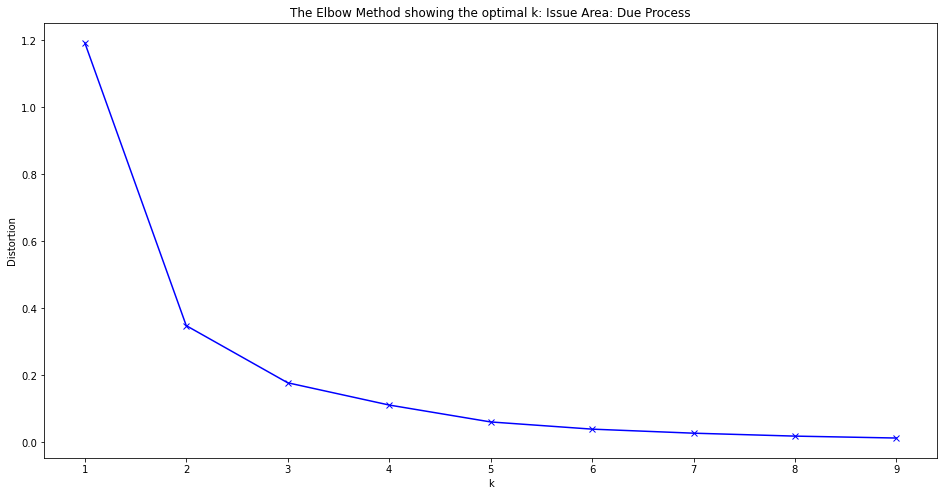

In [50]:
# Elbow Method for Issue 4: Due Process; optimal clusters: 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Due Process')
plt.show()

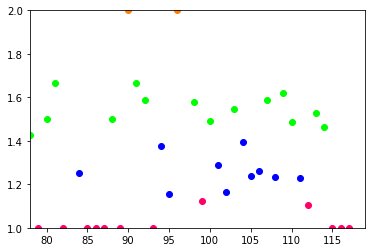

In [56]:
# Issue Area 5: Privacy -> 3 clusters

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[4])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[4][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[4][i]["direction"]
        justiceLabels[i] = justiceLeanings[4][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=4)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

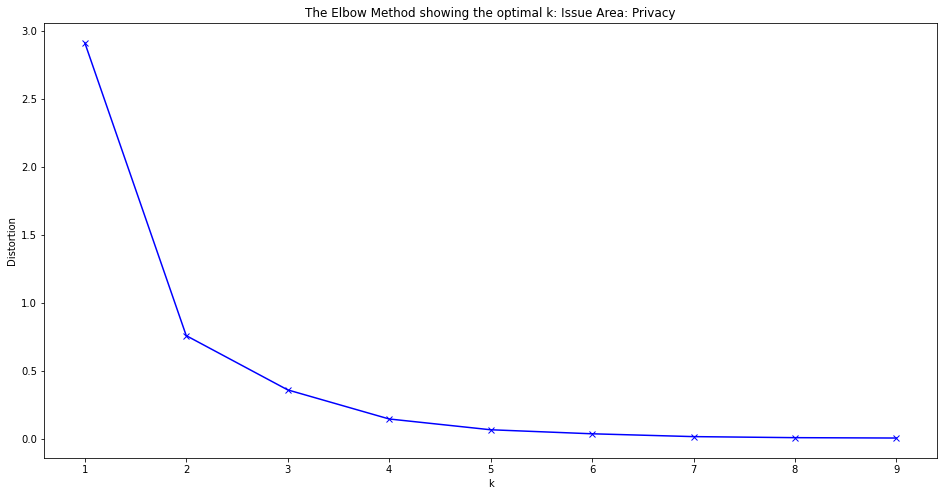

In [57]:
# Elbow Method for Issue 5: Privacy
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Privacy')
plt.show()

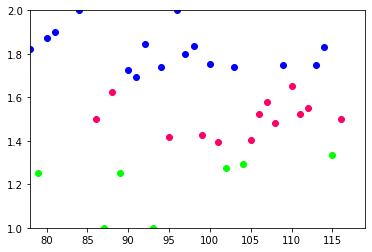

In [60]:
# Issue Area 6: Attorneys

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[5])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[5][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[5][i]["direction"]
        justiceLabels[i] = justiceLeanings[5][i]["justice"]

# Removing nan values from array (corresponds to justices who have never voted on this issue area)
justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()



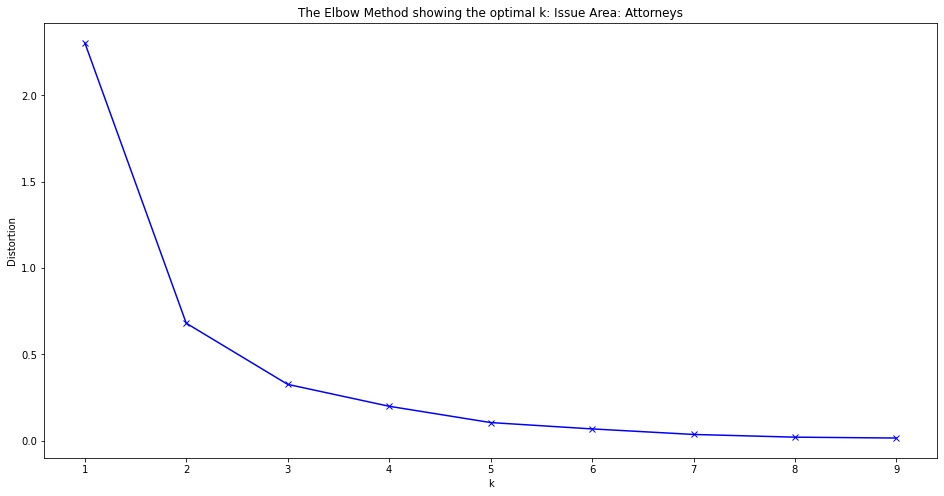

In [61]:
# Elbow Method for Issue 6: Attorneys - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)
# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Attorneys')
plt.show()

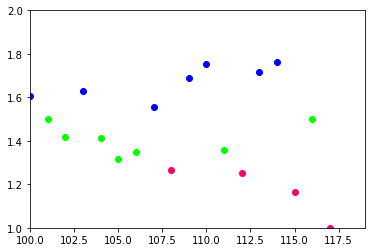

In [64]:
# Issue Area 7: Unions

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[6])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[6][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[6][i]["direction"]
        justiceLabels[i] = justiceLeanings[6][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

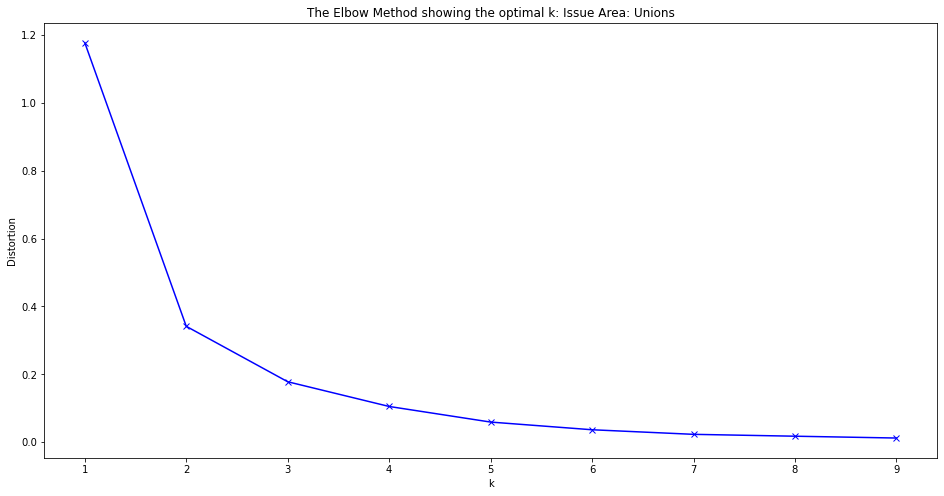

In [65]:
# Elbow Method for Issue 7: Unions - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Unions')
plt.show()

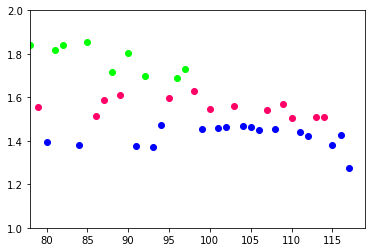

In [67]:
# Issue Area 8: Economic Activity

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[7])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[7][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[7][i]["direction"]
        justiceLabels[i] = justiceLeanings[7][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

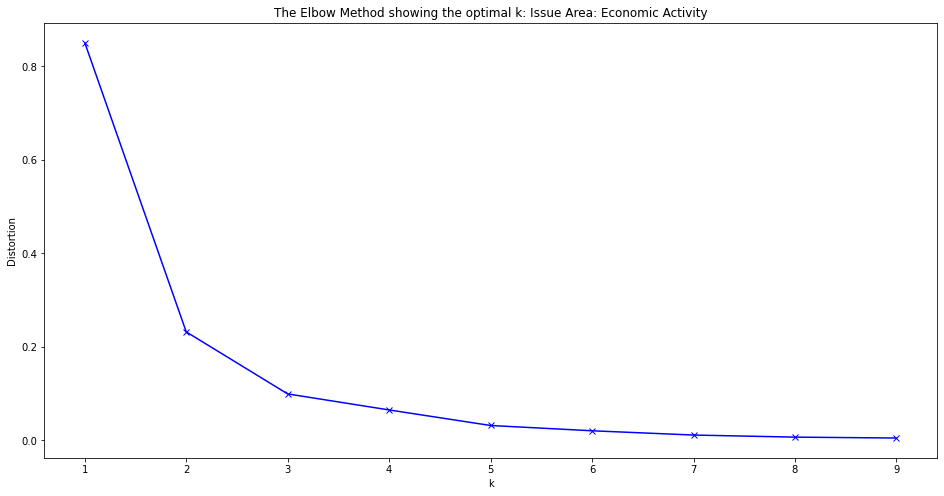

In [68]:
# Elbow Method for Issue 8: Economic Activity - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Economic Activity')
plt.show()

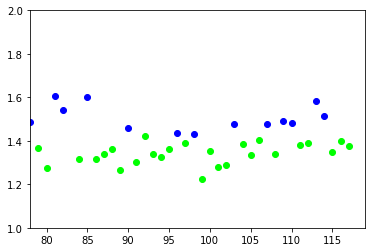

In [70]:
# Issue Area 9: Judicial Power

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[8])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[8][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[8][i]["direction"]
        justiceLabels[i] = justiceLeanings[8][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=2)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

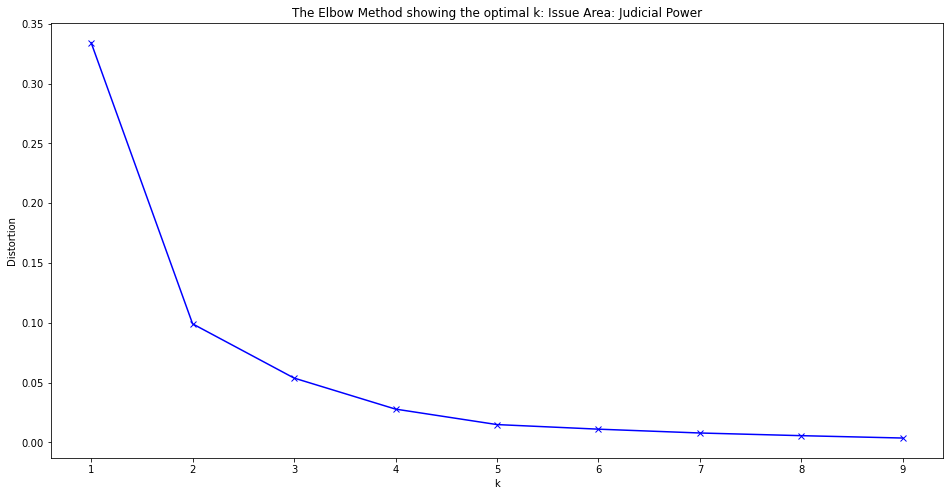

In [71]:
# Elbow Method for Issue 8: Judicial Power - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Judicial Power')
plt.show()

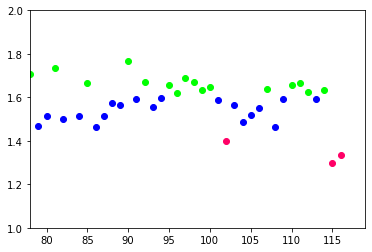

In [75]:
# Issue Area 10: Federalism

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[9])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[9][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[9][i]["direction"]
        justiceLabels[i] = justiceLeanings[9][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

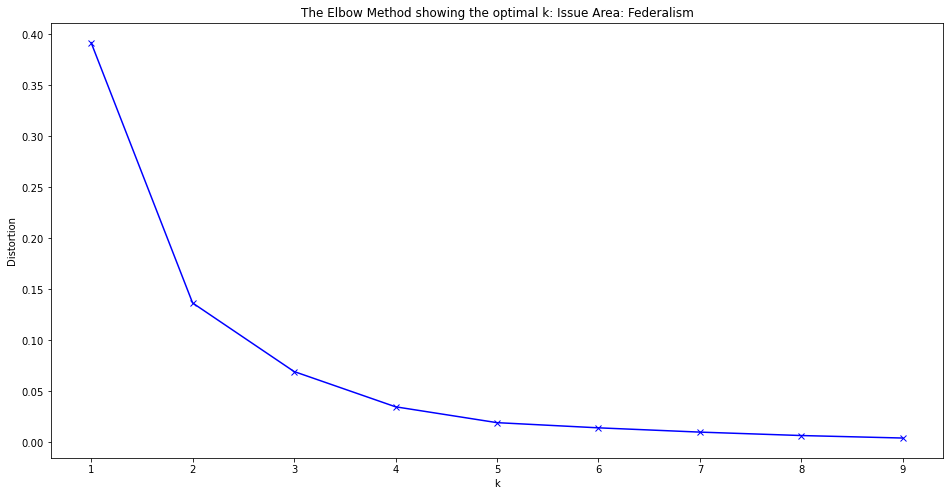

In [76]:
# Elbow Method for Issue 10: Federalism - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Federalism')
plt.show()

In [82]:
# Issue Area 11: Interstate Relations

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[10])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[10][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[10][i]["direction"]
        justiceLabels[i] = justiceLeanings[10][i]["justice"]

print (justiceData)
# NO DATA FOR THIS ISSUE AREA



[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


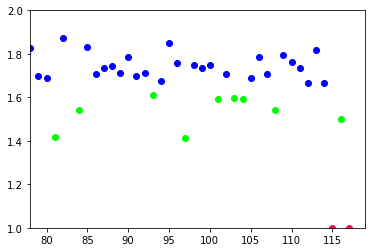

In [83]:
# Issue Area 12: Federal Taxation

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[11])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[11][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[11][i]["direction"]
        justiceLabels[i] = justiceLeanings[11][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

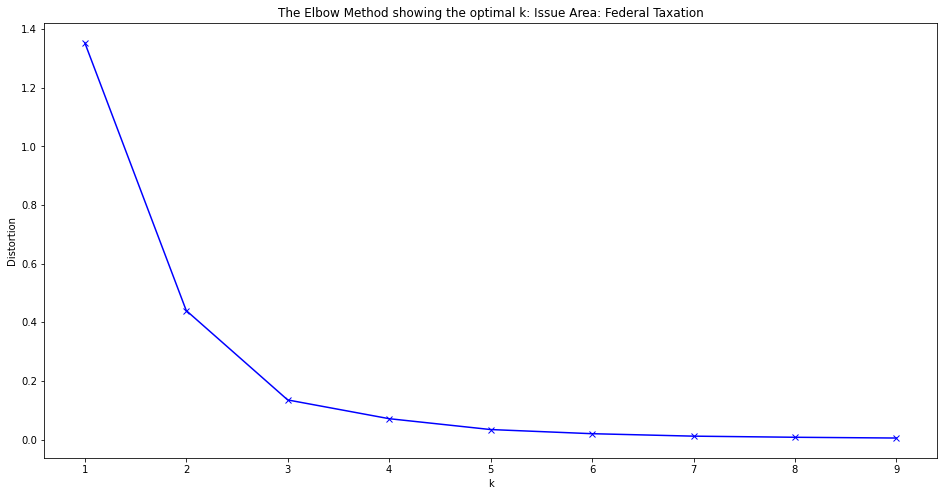

In [84]:
# Elbow Method for Issue 12: Federal Taxation - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Federal Taxation')
plt.show()

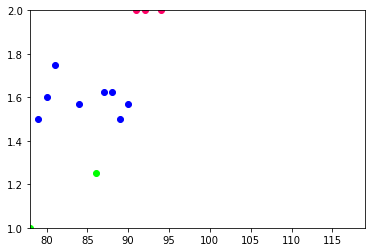

In [85]:
# Issue Area 13: Miscellaneous

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[12])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[12][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[12][i]["direction"]
        justiceLabels[i] = justiceLeanings[12][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/343441993.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)


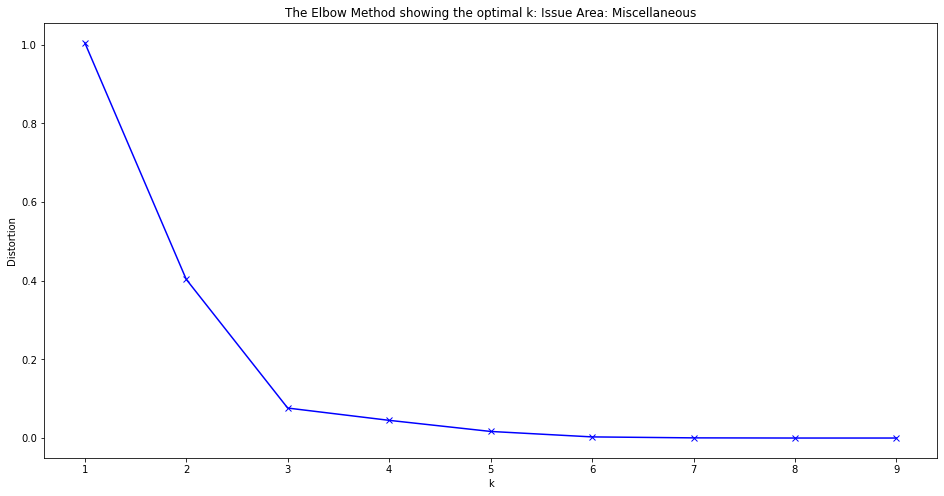

In [86]:
# Elbow Method for Issue 13: Miscellaneous - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Miscellaneous')
plt.show()

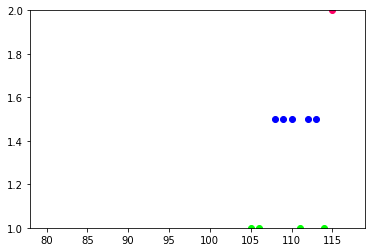

In [91]:
# Issue Area 14: Private Action

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[13])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[13][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[13][i]["direction"]
        justiceLabels[i] = justiceLeanings[13][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipy

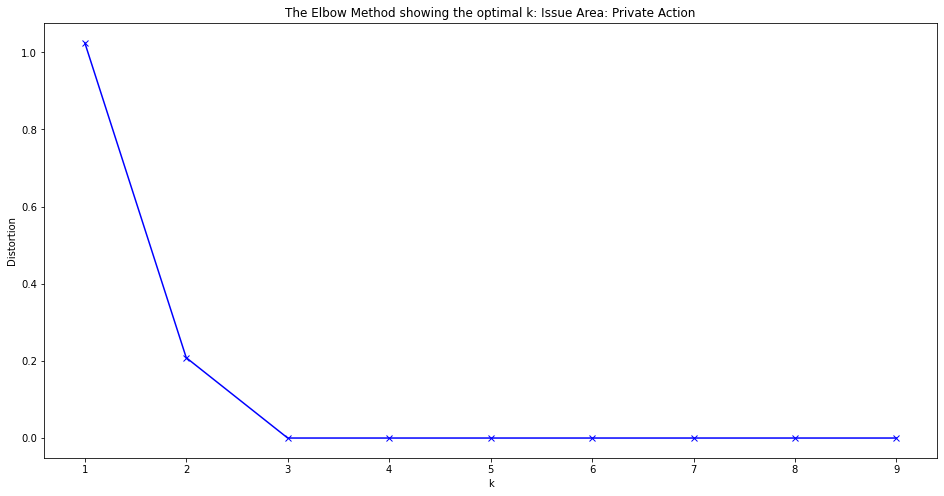

In [92]:
# Elbow Method for Issue 14: Private Action - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Private Action')
plt.show()